In [181]:
from astropy.io import fits
import numpy as np
from astropy.table import Table
#import sys
#sys.path.append('/Users/rociokiman/Documents/Gaia-Cupid/ActivityAgeRelation/banyan_sigma')
#from banyan_sigma import banyan_sigma
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord  
import astropy.units as u
import os
#import random
%matplotlib notebook

In [15]:
literature_search = Table.read('Catalogs/literature_search.fits')
source_ref_table = Table.read('Catalogs/source_ref.csv')

In [3]:
#Numbers for each reference
source_num_ref = source_ref['source_num']

In [4]:
ra = np.array(literature_search['ra'])
dec = np.array(literature_search['dec'])
ewha = np.array(literature_search['ewha'])
source = np.array(literature_search['source_ref'])
source_num = np.array(literature_search['source_num'])
source_ref = np.array(literature_search['source_ref'])

In [62]:
Ntot = len(ra)
same_star = np.zeros(Ntot)
c_all = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
dummy = 1
for i in range(Ntot):
    if(i%10000==0):
        print('{} out of {}'.format(i,Ntot))
    c1 = SkyCoord(ra=ra[i]*u.deg, dec=dec[i]*u.deg)
    separation = c1.separation(c_all).arcsec
    mask_close = separation < 2
    if(len(ra[mask_close])>1 and any(same_star[mask_close]==0)):
        same_star[mask_close] = dummy
        dummy+=1

0 out of 89270


/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


10000 out of 89270
20000 out of 89270
30000 out of 89270
40000 out of 89270
50000 out of 89270
60000 out of 89270
70000 out of 89270
80000 out of 89270


In [ ]:
'''
#Define a new table to sort by ra and dec
literature_search_sorted = literature_search
#Define number id that helps identify each star
literature_search_sorted['extra_id'] = np.arange(len(literature_search['ra']))
#Sort new table
literature_search_sorted.sort(('ra','dec'))
#index to sent arrays to original state
idx = np.argsort(literature_search_sorted['extra_id'])
#New arrays ra,dec sorted
ra_sorted = literature_search_sorted['ra']
dec_sorted = literature_search_sorted['dec']

#Defines an array that is going to indicate which stars are the same. 
#Having the same number in same_star_sorted means they are the same star.
same_star_sorted = np.zeros(len(ra_sorted))
dummy = 1
for i in range(len(ra_sorted)-1):
    c1 = SkyCoord(ra=ra_sorted[i]*u.deg, dec=dec_sorted[i]*u.deg)
    c2 = SkyCoord(ra=ra_sorted[i+1]*u.deg, dec=dec_sorted[i+1]*u.deg)
    separation = c1.separation(c2).arcsec
    if(separation <= 5):
        same_star_sorted[i] = dummy
        same_star_sorted[i+1] = dummy
    else:
        dummy +=1

same_star = same_star_sorted[idx]
'''

In [96]:
N_ref = len(source_num_ref)
ewha_i = []
ewha_j = []
matrix_prob = np.ones((N_ref,N_ref))*0
matrix_prob_all = np.ones((N_ref,N_ref))*0
mean,std,delta=[],[],[]
for x in range(1,int(max(same_star_sorted)+1)):
    mask = (same_star == x) *~np.isnan(ewha)
    if(len(ewha[mask])>1):
        ### --- Test for the selection of equal stars --- ### 
        #if(19 in source_num[mask]):
        #    print(x)
        #    for ra_i,dec_i,source_i in zip(ra[mask],dec[mask],source[mask]):
        #        print(ra_i,dec_i,source_i)
        ### --- --- ###

        mean.append(np.nanmean(ewha[mask]))
        std.append(np.nanstd(ewha[mask]))
        delta.append(np.nanmax(ewha[mask])-np.nanmin(ewha[mask]))
        source_num_mask = source_num[mask]
        ewha_mask = ewha[mask]
        N = len(source_num_mask)
        for i in range(N):
            for j in range(N):
                if(source_num_mask[i]!=source_num_mask[j]):
                    if(abs(ewha_mask[i]-ewha_mask[j])<3):
                        matrix_prob[int(source_num_mask[i]),int(source_num_mask[j])]+=1
                    matrix_prob_all[int(source_num_mask[i]),int(source_num_mask[j])]+=1
                if(source_num_mask[i]<source_num_mask[j]):
                    ewha_i.append(ewha_mask[i])
                    ewha_j.append(ewha_mask[j])
                        
mean,std,delta = np.array(mean),np.array(std),np.array(delta)
ewha_i, ewha_j = np.array(ewha_i), np.array(ewha_j)

(-3, 20)

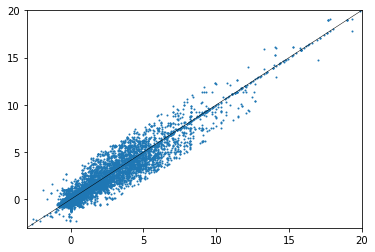

In [138]:
x = np.linspace(-3,20)
mask_ha = abs(ewha_i-ewha_j)<3
plt.scatter(ewha_i[mask_ha],ewha_j[mask_ha],s=1)
plt.plot(x,x,'k-',linewidth=.5)
plt.xlim(-3,20)
plt.ylim(-3,20)

In [167]:
mask_compatible = np.array([x in compatible for x in source_num])

In [168]:
N_ref = len(source_num_ref)
mean_compatible,std_compatible,delta_compatible=[],[],[]
for x in range(1,int(max(same_star_sorted)+1)):
    mask = (same_star == x) * (~np.isnan(ewha)) * mask_compatible
    if(len(ewha[mask])>1):
        mean_compatible.append(np.nanmean(ewha[mask]))
        std_compatible.append(np.nanstd(ewha[mask]))
        delta_compatible.append(np.nanmax(ewha[mask])-np.nanmin(ewha[mask]))
                        
mean_compatible = np.array(mean_compatible)
std_compatible,delta_compatible = np.array(std_compatible),np.array(delta_compatible)

<IPython.core.display.Javascript object>


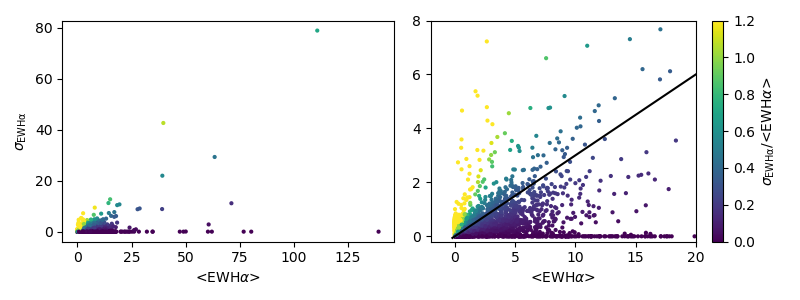

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [239]:
x = np.linspace(-0.2,140)
y = x*0.3
f,(ax1,ax2) = plt.subplots(1,2,figsize=(8,3)) 
cax = ax1.scatter(abs(mean_compatible),std_compatible,c=abs(std_compatible/mean_compatible),s=4,vmin=0,vmax=1.2)
ax1.set_xlabel(r'<EWH$\alpha$>')
ax1.set_ylabel(r'$\sigma_{\rm EWH\alpha}$')

ax2.scatter(abs(mean_compatible),std_compatible,c=abs(std_compatible/mean_compatible),s=4,vmin=0,vmax=1.2)
ax2.plot(x,y,'k-')
ax2.set_xlim(-2,20)
ax2.set_ylim(-0.2,8)
ax2.set_xlabel(r'<EWH$\alpha$>')

plt.colorbar(cax,label=r'$\sigma_{\rm EWH\alpha}$/<EWH$\alpha$>')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


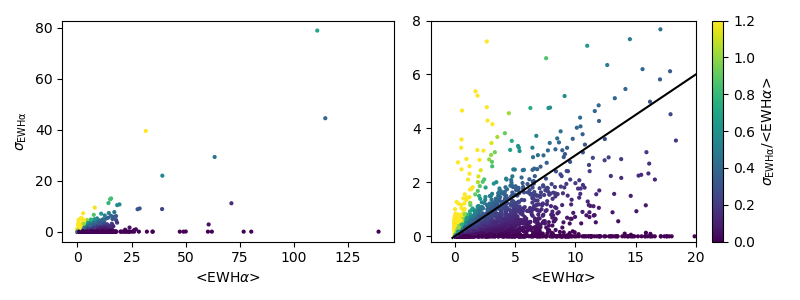

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [238]:
x = np.linspace(-0.2,140)
y = x*0.3
vmax=1.2
f,(ax1,ax2) = plt.subplots(1,2,figsize=(8,3)) 
cax = ax1.scatter(abs(mean),std,c=abs(std/mean),s=4,vmin=0,vmax=vmax)
ax1.set_xlabel(r'<EWH$\alpha$>')
ax1.set_ylabel(r'$\sigma_{\rm EWH\alpha}$')

ax2.scatter(abs(mean),std,c=abs(std/mean),s=4,vmin=0,vmax=vmax)
ax2.plot(x,y,'k-')
ax2.set_xlim(-2,20)
ax2.set_ylim(-0.2,8)
ax2.set_xlabel(r'<EWH$\alpha$>')

plt.colorbar(cax,label=r'$\sigma_{\rm EWH\alpha}$/<EWH$\alpha$>')
plt.tight_layout()
plt.show()

In [170]:
compatible = []
prob = []
total_comp = []
order = []
for i in range(N_ref):
    if(matrix_prob[i,19] > 0.0):
        prob_i = matrix_prob[i,19]/matrix_prob_all[i,19]
        if(i not in compatible and prob_i > 0.8):
            compatible.append(i)
            prob.append(prob_i)
            total_comp.append(matrix_prob[i,19])
            order.append(1)
for i in compatible:
    for j in range(N_ref):
        if((matrix_prob[j,i] > 0)):
            prob_j = matrix_prob[j,i]/matrix_prob_all[j,i]
            if(j not in compatible and prob_j > 0.9):
                compatible.append(j)
                prob.append(prob_j)
                total_comp.append(matrix_prob[j,i])
                order.append(2)
compatible,prob,total_comp,order = np.array(compatible),np.array(prob),np.array(total_comp),np.array(order)
idx = np.argsort(compatible)
compatible = compatible[idx]
prob = prob[idx]
total_comp = total_comp[idx]
order = order[idx]

for x,y,z,w in zip(compatible,prob,total_comp,order):
    print(source_ref_table['source_ref'][x],y,z,w)
    
#compatible = list(compatible)
#compatible.remove(source_num_ref[source_ref_table['source_ref']=='Reiners 2010'][0])
#compatible.append(source_num_ref[source_ref_table['source_ref']=='Newton 2017'][0])
#compatible.append(source_num_ref[source_ref_table['source_ref']=='Gizis 2002'][0])
#compatible.append(source_num_ref[source_ref_table['source_ref']=='Alonso-Floriano 2015'][0])
#compatible = np.sort(compatible)
#compatible = np.array(compatible)

Alonso-Floriano 2015 0.9903846153846154 103.0 2
Ansdell 2015 0.975609756097561 40.0 2
Bouy 2009 1.0 1.0 2
Cruz 2002 1.0 1.0 2
Douglas 2014 1.0 60.0 1
Elliott 2016 1.0 1.0 2
Fang 2018 1.0 1.0 1
Gaidos 2014 1.0 1.0 2
Gizis 2002 0.9922077922077922 382.0 2
Hawley 1996 1.0 1.0 2
Jayawardhana 2006 1.0 2.0 2
Jeffers 2018 1.0 9.0 2
Kiman 2019 1.0 60.0 2
Kraus 2014 1.0 1.0 2
Lepine 2009 1.0 1.0 2
Lepine 2013 1.0 9.0 2
LG11 0.9375 15.0 2
Lyo 2004 1.0 2.0 2
Malo 2014 1.0 2.0 2
Mochnacki 2002 1.0 3.0 2
Mohanty 2003 1.0 1.0 2
Newton 2017 0.937888198757764 151.0 2
Reid 1995 1.0 247.0 2
Reid 2002 1.0 3.0 1
Reid 2007 1.0 2.0 2
Reiners 2008 1.0 1.0 2
Reiners 2010 1.0 3.0 1
Riaz 2006 0.9411764705882353 16.0 2
Riedel 2014 1.0 1.0 2
Rodriguez 2014 0.9375 15.0 2
Schneider 2019 1.0 10.0 2
Shkolnik 2009 1.0 20.0 2
Shkolnik 2017 1.0 7.0 2
Slesnick 2006 0.9565217391304348 22.0 2
Slesnick 2008 0.9347826086956522 86.0 2
Song 2003 1.0 1.0 2
Song 2004 1.0 2.0 2
Terrien 2015 1.0 56.0 2
Torres 2006 1.0 1.0 2
West 20

In [171]:
literature_search['ewha_all'] = literature_search['ewha']
literature_search['ewha_error_all'] = literature_search['ewha_error']
literature_search['ewha'][~mask_compatible] = np.nan
literature_search['ewha_error'][~mask_compatible] = np.nan

In [241]:
literature_search.write('literature_search_compatible.fits',format='fits',overwrite=True)

In [215]:
os.remove('/Users/rociokiman/Dropbox/Apps/Overleaf/Age-Activity Relation for M dwarfs/sources_summary.tex')
file_sources = open('/Users/rociokiman/Dropbox/Apps/Overleaf/Age-Activity Relation for M dwarfs/sources_summary.tex','x')

In [216]:
Ntot = len(ra)
Ncomp = len(ra[mask_compatible])
n_sources = len(source_ref_table['source_ref'])
total_incompatible = 0
papers_notes = 'Other works checked in literature search but were considered incompatible: '
#Header
file_sources.write('\\begin{deluxetable*}{ccccc}[ht!]\n')
file_sources.write('\\tablewidth{290pt}\n')
file_sources.write('\\tabletypesize{\scriptsize}\n')
file_sources.write('\\tablecaption{Compatible references for $\haew$. \\label{table:source_ref}}\n')
file_sources.write('\\tablehead{\\colhead{Reference \\tablenotemark{a}} & \\colhead{Resolution} & \\colhead{$N$ Stars} & \\colhead{$N$ Stars Compatible} & \\colhead{OC \\tablenotemark{b}} \\\ & & Total='+str(Ncomp) +'& &\n}')
file_sources.write('\\startdata \n')

for i in range(n_sources):
    if i in compatible:
        mask = i == compatible
        compatible_i = int(total_comp[mask][0])
        order_i = int(order[mask][0])
    else:
        compatible_i = 0
        order_i = '-'
    n_i = len(ra[source_num == i])
    if(n_i!=0 and compatible_i!=0):
        file_sources.write('{}&{}&{}&{}&{}\\\ \n'.format(source_ref_table['cite'][i],source_ref_table['resolution'][i],
                                               n_i,compatible_i,order_i)) 
    elif(compatible_i==0):
        total_incompatible += n_i
        papers_notes = papers_notes + source_ref_table['cite'][i] + ', '
file_sources.write('\\enddata \n')
file_sources.write('\\tablenotetext{a}{'+ papers_notes +'.}\n')
file_sources.write('\\tablenotetext{b}{Order of compatibility. Order 1 is compatible with \\citet{Kiman2019}. Order 2 are compatible with order 1 catalogs.}\n')
file_sources.write('\\end{deluxetable*}\n')

19

In [217]:
file_sources.close()